## 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. If your group consists of students from different classes, upload in **both** classes.

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365



2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.


In [62]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import seaborn as sns

# 1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:


In [63]:

# Path to  Excel file
file_path = "listings.csv"

# Read the Excel file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(data.head())

      id                         listing_url       scrape_id last_scraped  \
0   6983   https://www.airbnb.com/rooms/6983  20220924142144   2022-09-24   
1  26057  https://www.airbnb.com/rooms/26057  20220924142144   2022-09-25   
2  26473  https://www.airbnb.com/rooms/26473  20220924142144   2022-09-25   
3  29118  https://www.airbnb.com/rooms/29118  20220924142144   2022-09-25   
4  31094  https://www.airbnb.com/rooms/31094  20220924142144   2022-09-24   

            source                                               name  \
0  previous scrape                               Copenhagen 'N Livin'   
1      city scrape                Lovely house - most attractive area   
2      city scrape          City Centre Townhouse Sleeps 1-10 persons   
3      city scrape                    Best Location in Cool Istedgade   
4  previous scrape  Beautiful, spacious, central, renovated Penthouse   

                                         description  \
0  Lovely apartment located in the hip Nør

In [64]:
# List of columns to keep
columns_to_keep = ['id','name','host_id','host_name','neighbourhood_cleansed','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','calculated_host_listings_count','availability_365']  



# Use the drop method to remove all columns except those in columns_to_keep
data = data[columns_to_keep]

# Display the first few rows of the DataFrame to verify
print(data.head())

      id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name     neighbourhood_cleansed   latitude  longitude        room_type  \
0     Simon                    Nrrebro  55.686410  12.547410  Entire home/apt   
1      Kari                   Indre By  55.693070  12.576490  Entire home/apt   
2     Julia                   Indre By  55.676020  12.575400  Entire home/apt   
3      Nana  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
4      Ebbe  Vesterbro-Kongens Enghave  55.666602  12.555283  Entire home/apt   

       price  minimum_nights  ...  review_scores_rating  \
0    $898.00         

# 2. Next we have to handle missing values. Remove all rows where number_of_reviews = 0. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

In [65]:
# Printing the value 
print("Number of rows before removing Nan and no reviews " + str(data.shape))

# Step 1: Remove rows where number_of_reviews = 0
data = data[data['number_of_reviews'] != 0]

# Remove the rows with missing values NaN 
data = data.dropna()

# Now 'data' contains rows where number_of_reviews is not 0 and no missing values

# Verifying if the size decreased after removing rows
print("Number of rows after removing Nan and no reviews " + str(data.shape))


Number of rows before removing Nan and no reviews (13815, 22)
Number of rows after removing Nan and no reviews (12126, 22)


# 3. Fix the neighbourhood_cleansed values (some are missing 'æ ø å'), and if necessary change the price to DKK.

In [66]:
neighbourhood = data['neighbourhood_cleansed'].unique()
# Printing the value
print(neighbourhood)


['Nrrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'sterbro' 'Amager Vest'
 'Frederiksberg' 'Amager st' 'Valby' 'Bispebjerg' 'Vanlse' 'Brnshj-Husum']


In [67]:
# Define a mapping dictionary
character_mapping = {
    'Nrrebro': 'Nørrebro',
    'sterbro': 'Østerbro',
    'Amager st': 'Amager Strand',
    'Vanlse': 'Vanløse',
    'Brnshj-Husum': 'Brønshøj-Husum'
}

# Apply the mapping to the DataFrame - replace the wrong values with the correct ones
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].replace(character_mapping)

# Verify that the mapping worked
neighbourhood = data['neighbourhood_cleansed'].unique()
print(neighbourhood)    


['Nørrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Østerbro'
 'Amager Vest' 'Frederiksberg' 'Amager Strand' 'Valby' 'Bispebjerg'
 'Vanløse' 'Brønshøj-Husum']


# 4. Create a fitting word cloud based on the name column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).


In [68]:
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

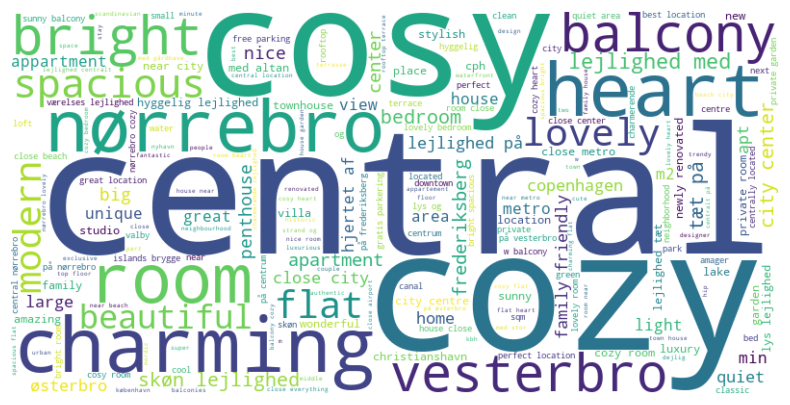

In [69]:
# Extract the name column from the DataFrame and make it to lower case 
name_data = data['name'].str.lower()

#  Remove non-descriptive stop words, including variations of 'Copenhagen'
stop_words = ['Copenhagen', 'Copenhagen', 'copenhagen', 'COPENHAGEN', 'København', 'the', 'and', 'in', 'to', 'for', 'with','apartment', 'CPH']

# make stopwords tolower case 
stop_words = [x.lower() for x in stop_words]


# Handle NaN values by replacing them with an empty string
name_data = name_data.fillna('')

# Convert integer values to strings and apply text preprocessing
name_data = name_data.apply(lambda x: ' '.join([str(word) for word in str(x).split() if str(word).lower() not in stop_words]))


# Create the WordCloud object
text = ' '.join(name_data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# 5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to Danmarks Statistik?

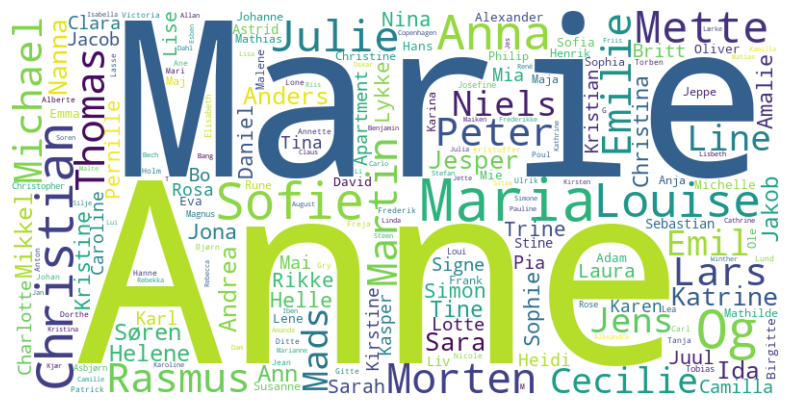

In [70]:
# Extract the name of host  column from the DataFrame and make it to lower case 
name_of_the_hostname = data['host_name'].unique()

# Creating a wordcloud of the names of the hosts
text = ' '.join(name_of_the_hostname)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



We can see it resemble the stats 

# 6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin > 10,000.

In [71]:

# Replace 'data' with your actual DataFrame
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Define bin edges, evenly distributed with the last bin > 10,000
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]
bin_label = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000+']


# Create a new column 'price_bin' using the cut() function
data['price_bin'] = pd.cut(data['price'], bins=bin_edges, labels=bin_label, include_lowest=True)

# Print the DataFrame to see the new column
data[['price', 'price_bin']].head()


,price,price_bin
0,898.0,0-1000
1,2600.0,2000-3000
2,3250.0,3000-4000
3,725.0,0-1000
4,1954.0,1000-2000


# 7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

In [72]:
import folium

#Generating small data cause main data is way too big to plot
data_small = data.sample(n=1000, random_state=1)


# Create a map centered around Copenhagen
copenhagen_map = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Define colors for each price bin
bin_colors = {
    '0-1000': 'red',
    '1000-2000': 'blue',
    '2000-3000': 'green',
    '3000-4000': 'orange',
    '4000-5000': 'purple',
    '5000-6000': 'pink',
    '6000-7000': 'brown',
    '7000-8000': 'gray',
    '8000-9000': 'cyan',
    '9000-10000': 'lime',
    '10000+': 'black'
}

# Add markers for each listing with color based on price bin
for index, row in data_small.iterrows():
    color = bin_colors[row['price_bin']]  # Get color based on price bin
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"Price: {row['price']}",
                  icon=folium.Icon(color=color)).add_to(copenhagen_map)

# Save the map to an HTML file
copenhagen_map.save('listings_map_with_bins_smalldata.html')

# Display the map 
#copenhagen_map


C:\Users\himal\AppData\Local\Temp\ipykernel_19888\3220152840.py:30: UserWarning: color argument of Icon should be one of: {'lightgray', 'white', 'red', 'darkred', 'green', 'lightgreen', 'blue', 'lightblue', 'darkblue', 'black', 'orange', 'cadetblue', 'beige', 'pink', 'purple', 'darkpurple', 'lightred', 'darkgreen', 'gray'}.
  icon=folium.Icon(color=color)).add_to(copenhagen_map)


C:\Users\himal\AppData\Local\Temp\ipykernel_19888\2958387509.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighbourhood_price_counts = data.groupby(['neighbourhood_cleansed', 'price_bin']).size().unstack(fill_value=0)


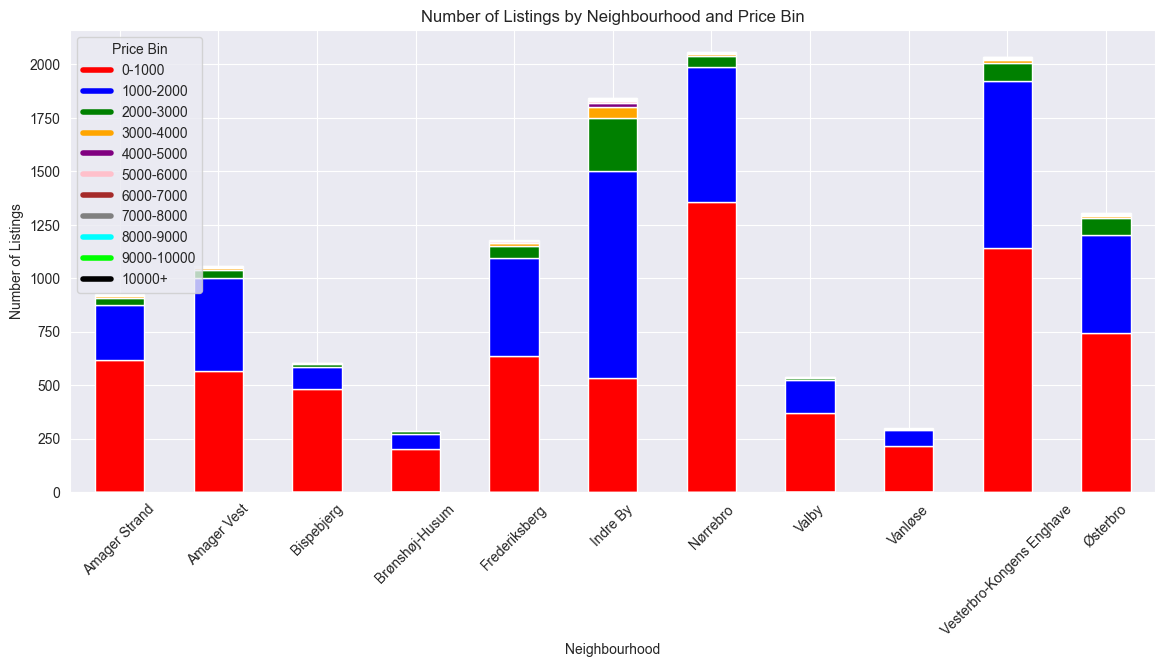

In [73]:
# Now for the neighbourhood
# Group listings by neighbourhood and price bin
neighbourhood_price_counts = data.groupby(['neighbourhood_cleansed', 'price_bin']).size().unstack(fill_value=0)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))
neighbourhood_price_counts.plot(kind='bar', stacked=True, color=[bin_colors[col] for col in neighbourhood_price_counts.columns], ax=ax)
plt.title('Number of Listings by Neighbourhood and Price Bin')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Price Bin')

# Add a legend for price bins
price_legend = [plt.Line2D([0], [0], color=bin_colors[price_bin], lw=4) for price_bin in neighbourhood_price_counts.columns]
plt.legend(price_legend, neighbourhood_price_counts.columns, title='Price Bin', loc='upper left')

plt.show()



# 8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


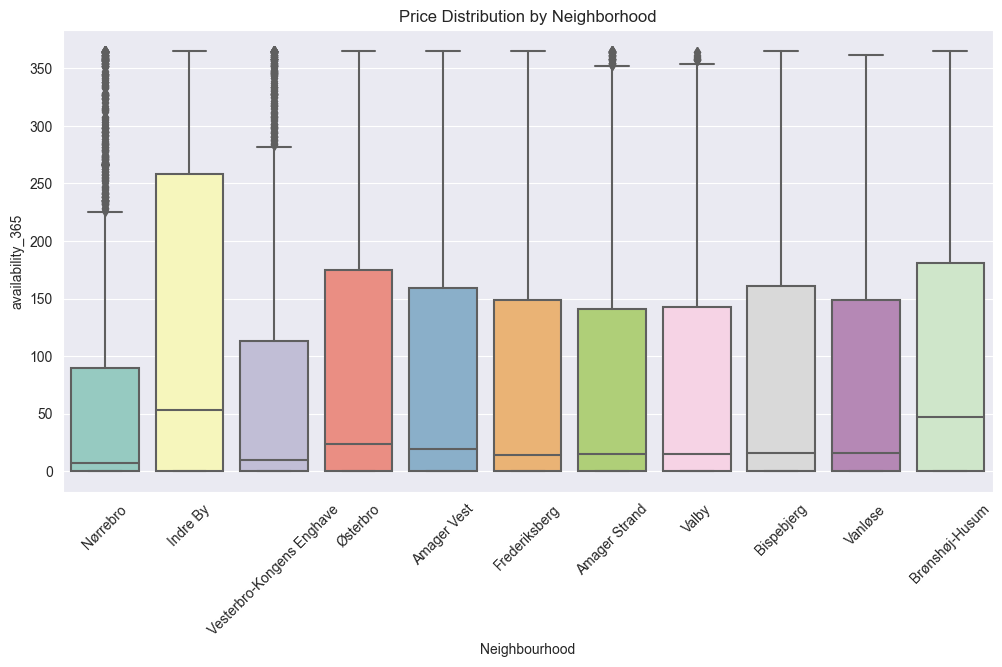

In [79]:
import seaborn as sns

# Assuming you have a DataFrame named 'data' with columns 'neighbourhood_cleansed' and 'price'
# Replace 'data' with your actual DataFrame

# Create a boxplot for price distribution by neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='availability_365', data=data, palette='Set3')
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighbourhood')
plt.ylabel('availability_365')
plt.xticks(rotation=45)
plt.show()


# 9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with n

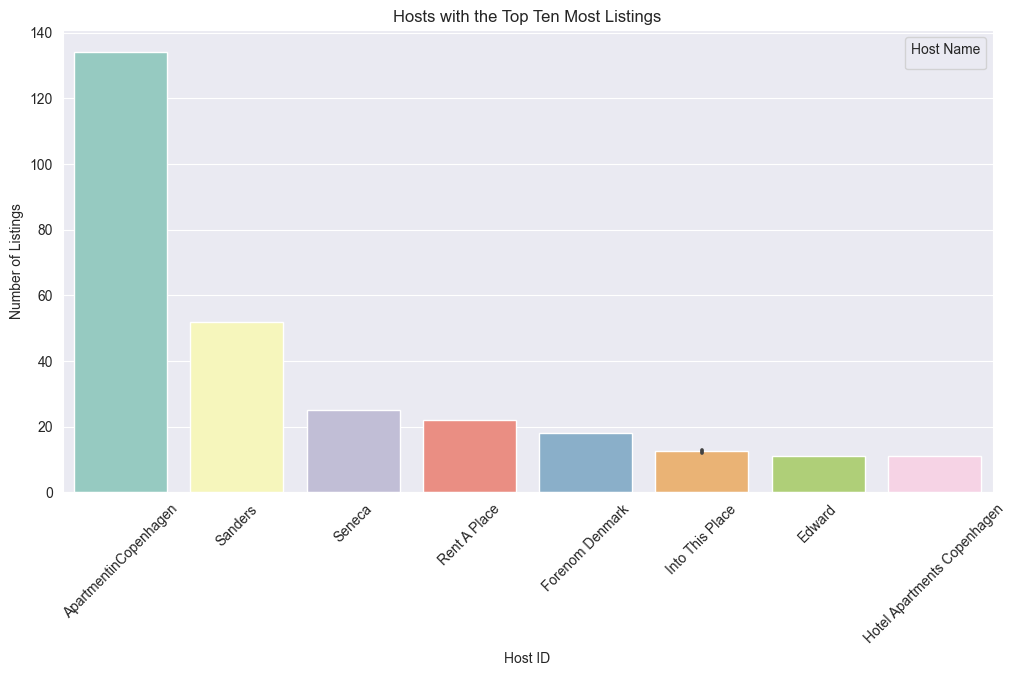

In [86]:

# Getting the top 10 host id's
top_10_hosts = data.groupby(['host_id', 'host_name']).size().reset_index(name='num_listings').nlargest(10, 'num_listings')

# Create a bar chart of the hosts with the top ten most listings
plt.figure(figsize=(12, 6))
sns.barplot(x='host_name', y='num_listings', data=top_10_hosts, palette='Set3')
plt.title('Hosts with the Top Ten Most Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Host Name', loc='upper right')
plt.show()


# 10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [89]:
# Define a custom function to calculate the mode
def calculate_mode(x):
    mode_value = x.mode().iloc[0] if len(x.mode()) > 0 else None
    return mode_value

# Define the feature to analyze (e.g., 'price')
feature_column = 'price'

# Group data by neighborhood and room type
grouped_data = data.groupby(['neighbourhood_cleansed', 'room_type'])[feature_column]

# Calculate descriptive statistics
descriptive_stats = grouped_data.agg(['mean', 'median', 'std', 'var', 'min', 'max', calculate_mode, lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename columns for clarity
descriptive_stats.columns = ['Mean', 'Median', 'Standard Deviation', 'Variance', 'Minimum', 'Maximum', 'Mode', '1st Quartile', '3rd Quartile']

# Reset the index to have neighborhoods and room types as columns
descriptive_stats.reset_index(inplace=True)

# Print the descriptive statistics
descriptive_stats

,neighbourhood_cleansed,room_type,Mean,Median,Standard Deviation,Variance,Minimum,Maximum,Mode,1st Quartile,3rd Quartile
0,Amager Strand,Entire home/apt,1093.584071,900.0,721.982284,5.212584e+05,240.0,10000.0,1000.0,700.00,1200.00
1,Amager Strand,Hotel room,1296.000000,1201.0,211.184753,4.459900e+04,1149.0,1538.0,1149.0,1175.00,1369.50
2,Amager Strand,Private room,549.325581,471.0,293.995992,8.643364e+04,135.0,2000.0,450.0,400.00,600.00
3,Amager Strand,Shared room,2575.000000,2575.0,NaN,NaN,2575.0,2575.0,2575.0,2575.00,2575.00
4,Amager Vest,Entire home/apt,1234.226623,1050.0,832.696891,6.933841e+05,250.0,14000.0,1000.0,814.00,1480.00
5,Amager Vest,Private room,1032.966216,500.0,5299.018095,2.807959e+07,200.0,64900.0,500.0,400.00,655.00
6,Amager Vest,Shared room,1051.500000,1051.5,112.429978,1.264050e+04,972.0,1131.0,972.0,1011.75,1091.25
7,Bispebjerg,Entire home/apt,992.592520,800.0,1981.580545,3.926661e+06,235.0,44000.0,700.0,600.00,1000.00
8,Bispebjerg,Private room,488.978947,400.0,353.674089,1.250854e+05,143.0,3000.0,300.0,300.00,528.50
9,Bispebjerg,Shared room,198.000000,198.0,NaN,NaN,198.0,198.0,198.0,198.00,198.00
